In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
#import cmocean as cmaps
import pandas as pd
#from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id= 'area'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)
#mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [5]:
mesh


FESOM mesh:
path                  = /gfs2/work/hbkvsk12/mesh/meshArc4.5
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 16950142

        

In [6]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [7]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

JAN
FEV
MAR
APR
MAY
JUN
JUL
AUG
SEP
OCT
NOV
DEC


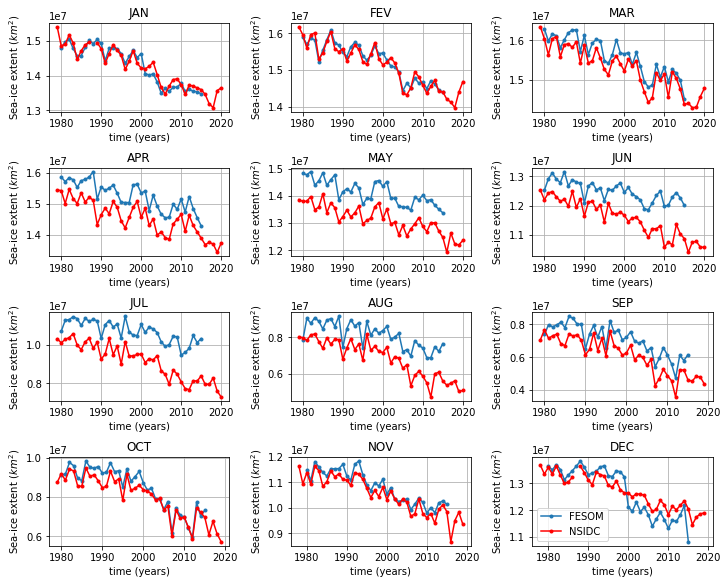

In [8]:
#X = genfromtxt(outputpath+'ICE_APR_1990_2015_trend.csv', delimiter=';')
#fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
figsize = (10, 8)
rows,cols = 4,3
months = range(0,12)

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
axs = trim_axs(axs, len(months))

for ax, mo in zip(axs, months):
    if mo ==0: 
        dayind = (range(0,15))
        month='JAN'
    if mo ==1: 
        dayind = (range(15,30))
        month='FEV'
    if mo ==2: 
        dayind = (range(30,45))
        month='MAR'
    if mo ==3: 
        dayind = (range(45,60))
        month='APR'
    elif mo ==4: 
        dayind = (range(60,75))
        month='MAY'
    elif mo ==5: 
        dayind = (range(75,90))
        month='JUN'
    elif mo ==6: 
        dayind = (range(90,105))
        month='JUL'
    elif mo ==7:
        dayind = (range(105,120))
        month='AUG'
    elif mo ==8: 
        dayind = (range(120,135))
        month='SEP'
    elif mo ==9: 
        dayind = (range(135,150))
        month='OCT'
    elif mo ==10: 
        dayind = (range(150,165))
        month='NOV'
    elif mo ==11: 
        dayind = (range(165,174))
        month='DEC'
    
    print month
    
    # initlialyze
    ICECON = np.zeros((len(years),len(mesh.x2)))
    ICEAREA = np.zeros((len(years),len(mesh.x2)))

    # loop over years
    for ind in range(0,len(years)):
         #print years[ind]
         if years[ind] == 2015 and mo == 11: # exception for the end of the time-series
            dayind = range(165,167)
            
         ncfile = resultpath+runid+'.'+str(years[ind])+'.ice.mean.nc'
         #print ncfile
         f      = Dataset(ncfile, 'r')
         if years[ind]<2000:
             ice    = f.variables[var_id][mo,0:mesh.n2d]
         else:
             ice    = f.variables[var_id][dayind,0:mesh.n2d].mean(axis=0)
             #ice    = ice / (len(dayind))
         arcsurf_ind = np.nonzero((mesh.y2>45.) & (ice>0.1))
         ICEAREA[ind,:]=np.sum(NodalAreaModel[arcsurf_ind])
         ICECON[ind,:] =np.mean(ice[mesh.y2>66.])
    
    if mo < 9:
        BSOfile = wd_path+'/data/NSIDC/N_0'+str(mo+1)+'_extent_v3.0.csv'
        #print BSOfile
        df = pd.read_csv(BSOfile, header=0, sep = ',',na_values=['-9999'], decimal=".",skipinitialspace=True)
    else:
        BSOfile = wd_path+'/data/NSIDC/N_'+str(mo+1)+'_extent_v3.0.csv'
        #print BSOfile
        df = pd.read_csv(BSOfile, header=0, sep = ',',na_values=['-9999'], decimal=".",skipinitialspace=True)
    icearea=ICEAREA.mean(axis=1)/1e6
    ax.plot(years,icearea,'.-')
    ax.plot(df.year,df.extent*1e6,'.-r')
    ax.grid(True)
    ax.set_xlabel('time (years)')
    ax.set_ylabel('Sea-ice extent ($km^2$)')
    ax.set_title(month)
    legend(['FESOM','NSIDC'])
    
plt.savefig(savepath+'sertemp/SEAICEEXTENT_timeseries_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight')      